## Visualisation and Observations

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
from sklearn.ensemble import RandomForestClassifier
from tensorflow.examples.tutorials.mnist import input_data

In [3]:
from generate_cifar import CIFAR

In [4]:
## Random dataset as random images
print 'Random dataset as random set of images (CIFAR-10)'
path = '../../Dataset/CIFAR-10/*'
cifar = CIFAR(path)
print cifar
new_data = cifar.resize_image((28,28,3))
print new_data.shape
random_dataset = cifar.drop_color_channel(new_data,(28,28,3),(28,28))
print random_dataset.shape

Random dataset as random set of images (CIFAR-10)
../../Dataset/CIFAR-10/batches.meta
../../Dataset/CIFAR-10/data_batch_1
../../Dataset/CIFAR-10/data_batch_2
../../Dataset/CIFAR-10/data_batch_3
../../Dataset/CIFAR-10/data_batch_4
../../Dataset/CIFAR-10/data_batch_5
../../Dataset/CIFAR-10/test_batch
((60000, 3072), (60000,))
(60000, 2352)
(60000, 784)


In [9]:
## Training the black box
print 'Creating the black box'
mnist = input_data.read_data_sets('data/MNIST_data/',one_hot=True)
rfc_black = RandomForestClassifier()
rfc_black.fit(mnist.train.images,np.argmax(mnist.train.labels,axis=1))

Creating the black box
Extracting data/MNIST_data/train-images-idx3-ubyte.gz
Extracting data/MNIST_data/train-labels-idx1-ubyte.gz
Extracting data/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting data/MNIST_data/t10k-labels-idx1-ubyte.gz


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [10]:
print 'Generating labels from black box for CIFAR-10'
label_random = rfc_black.predict(random_dataset)
print label_random.shape

Generating labels from black box for CIFAR-10
(60000,)


In [11]:
print 'Training white box on random images (CIFAR-10)'
rfc_white = RandomForestClassifier()
rfc_white.fit(random_dataset,label_random)

Training white box on random images (CIFAR-10)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [12]:
print 'Performance of White Box on actual dataset after trained on CIFAR-10'
print 'Accuracy: {}'.format(rfc_white.score(mnist.train.images,np.argmax(mnist.train.labels,1))*100)

Performance of White Box on actual dataset after trained on CIFAR-10
Accuracy: 10.1381818182


## Visualising CIFAR dataset

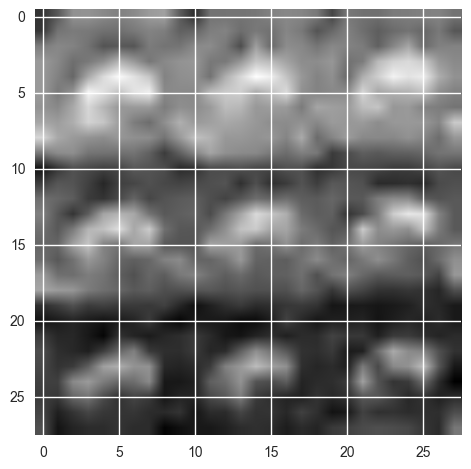

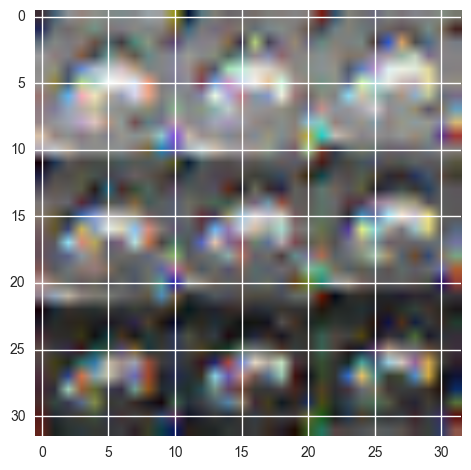

Label: 6
Predicted by black box: 0


In [22]:
plt.imshow(random_dataset[0,:].reshape((28,28)),cmap='gray')
plt.show()
plt.imshow(cifar.data[0,:].reshape((32,32,3)))
plt.show()
print 'Label: {}'.format(cifar.labels[0])
print 'Predicted by black box: {}'.format(label_random[0])

7050


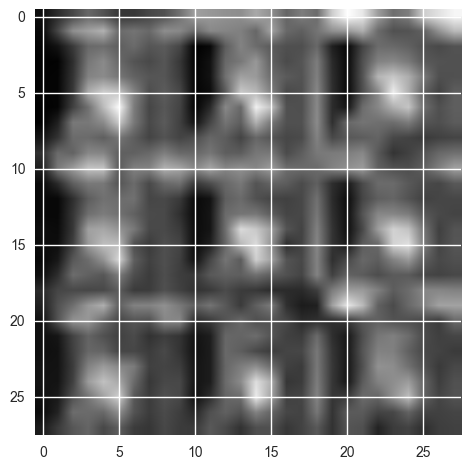

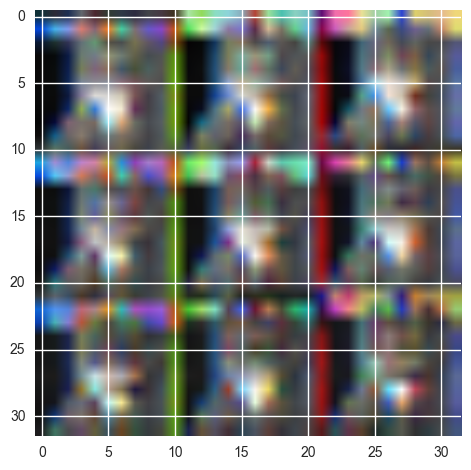

Label: 3
Predicted by black box: 0


In [25]:
inx = np.random.randint(0,60000)
print inx
plt.imshow(random_dataset[inx,:].reshape((28,28)),cmap='gray')
plt.show()
plt.imshow(cifar.data[inx,:].reshape((32,32,3)))
plt.show()
print 'Label: {}'.format(cifar.labels[inx])
print 'Predicted by black box: {}'.format(label_random[inx])

In [27]:
from collections import Counter
print 'Unique Values Predicted by Black Box for Random Dataset',np.unique(label_random)

Unique Values Predicted by Black Box for Random Dataset [0 1 2 3 5 6 7 8]


[]

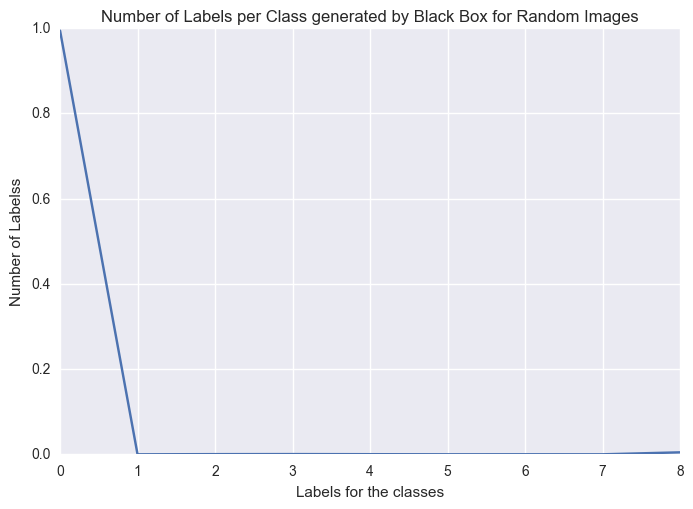

In [47]:
y = np.divide(Counter(label_random).values(),60000.00)
x = Counter(label_random).keys()
plt.plot(x,y)
plt.xlabel('Labels for the classes')
plt.ylabel('Number of Labelss')
plt.title('Number of Labels per Class generated by Black Box for Random Images')
plt.plot()